# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)
    
imgs = {}
for fileName in fileNames:
    img = cv2.imread(fileName)
    imgs[fileName[:-4]] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

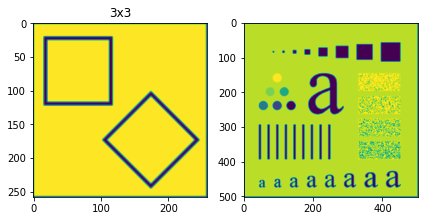

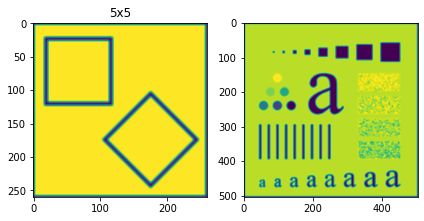

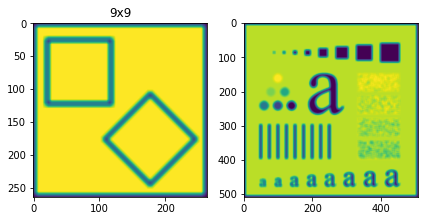

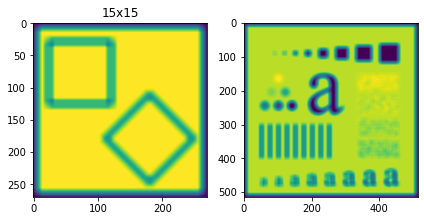

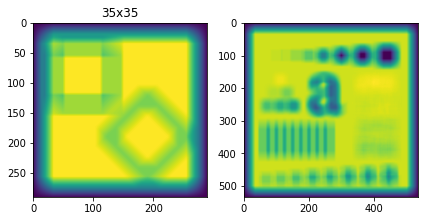

In [2]:
for w in [3, 5, 9, 15, 35]:
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    
    kernel = np.ones((w,w))/w**2
    ax1.imshow(signal.convolve2d(imgs['kw'], kernel))
    ax2.imshow(signal.convolve2d(imgs['plansza'], kernel))
    ax1.set_title(f"{w}x{w}")
    plt.tight_layout()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


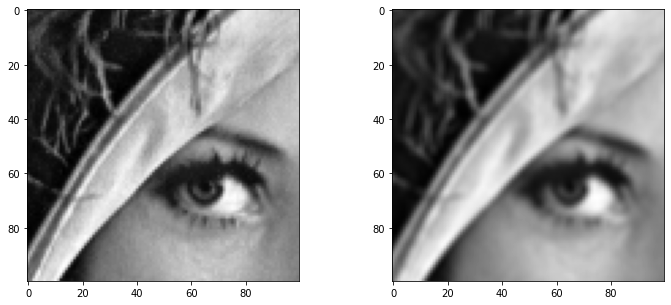

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
kernel = np.ones((3,3))/3**2
print(kernel)

ax1.imshow(imgs['lena'][200:300, 200:300], cmap="gray")
filtered = signal.convolve2d(imgs['lena'], kernel, mode="same")
ax2.imshow(filtered[200:300, 200:300], cmap="gray")

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


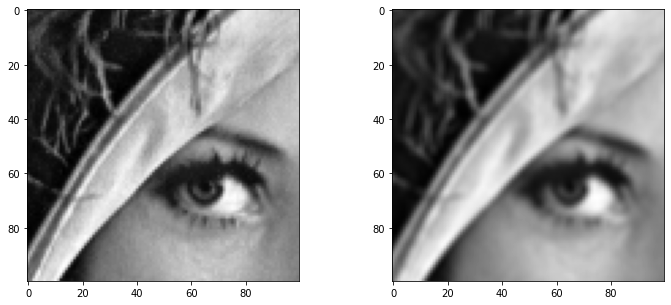

In [4]:
M = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3,3)
M = M/M.sum()
print(M)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.imshow(imgs['lena'][200:300, 200:300], cmap="gray")
filtered = signal.convolve2d(imgs['lena'], kernel, mode="same")
ax2.imshow(filtered[200:300, 200:300], cmap="gray")

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [5]:
def fgaussian(size, sigma):
    m = n = size
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*sigma**2))
    return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()

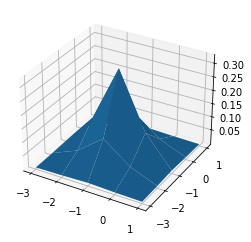

In [6]:
mesh(fgaussian(5,0.7), 5)

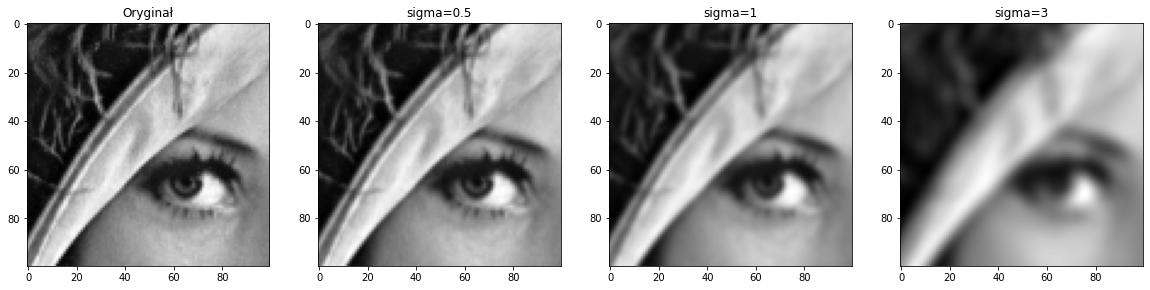

In [7]:
kernel1 = fgaussian(9, 0.5)
kernel2 = fgaussian(9, 1)
kernel3 = fgaussian(9, 3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.imshow(imgs['lena'][200:300, 200:300], cmap="gray")
ax1.set_title("Oryginał")

filtered1 = signal.convolve2d(imgs['lena'], kernel1, mode="same")
ax2.imshow(filtered1[200:300, 200:300], cmap="gray")
ax2.set_title("sigma=0.5")

filtered2 = signal.convolve2d(imgs['lena'], kernel2, mode="same")
ax3.imshow(filtered2[200:300, 200:300], cmap="gray")
ax3.set_title("sigma=1")

filtered3 = signal.convolve2d(imgs['lena'], kernel3, mode="same")
ax4.imshow(filtered3[200:300, 200:300], cmap="gray")
ax4.set_title("sigma=3")

plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [8]:
import seaborn as sns

In [9]:
def plot_denoising(img_og, img_noise, img_denoised):
    fig, axs = plt.subplots(ncols=4, figsize=(20,5), gridspec_kw={'width_ratios': [4,4,4,5]})
    
    axs[0].imshow(img_og, cmap="gray")
    axs[0].set_title("Original")

    axs[1].imshow(img_noise, cmap="gray")
    axs[1].set_title("Original with noise")

    axs[2].imshow(img_denoised, cmap="gray")
    axs[2].set_title("Denoised")

    diff = img_denoised.astype(int) - img_og.astype(int)
    sns.heatmap(diff, cmap = 'coolwarm', ax=axs[3], square=True)
    axs[3].set_title("Difference to original")

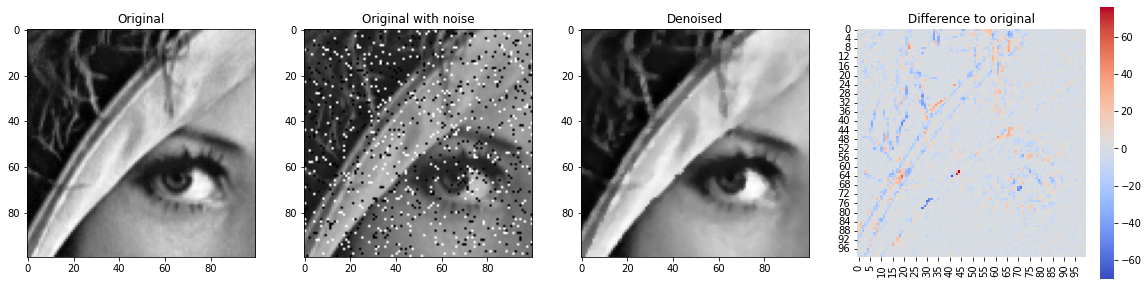

In [10]:
filtered = cv2.medianBlur(imgs['lenaSzum'], 3)
plot_denoising(
    imgs['lena'][200:300, 200:300],
    imgs['lenaSzum'][200:300, 200:300],
    filtered[200:300, 200:300],
)

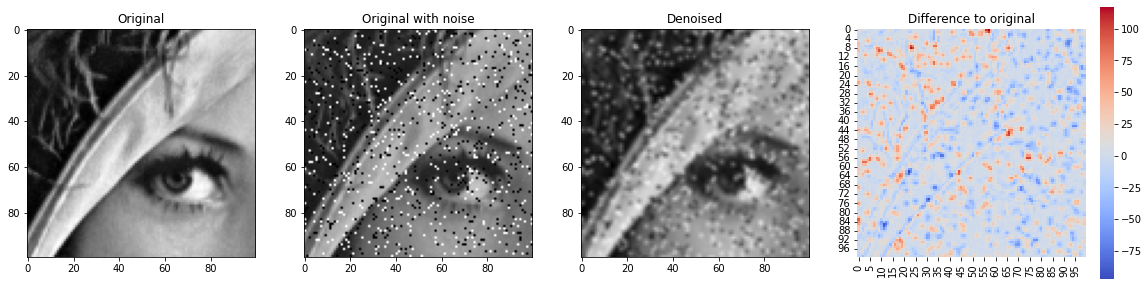

In [11]:
filtered = cv2.GaussianBlur(imgs['lenaSzum'], (3,3), 0)
plot_denoising(
    imgs['lena'][200:300, 200:300],
    imgs['lenaSzum'][200:300, 200:300],
    filtered[200:300, 200:300],
)

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

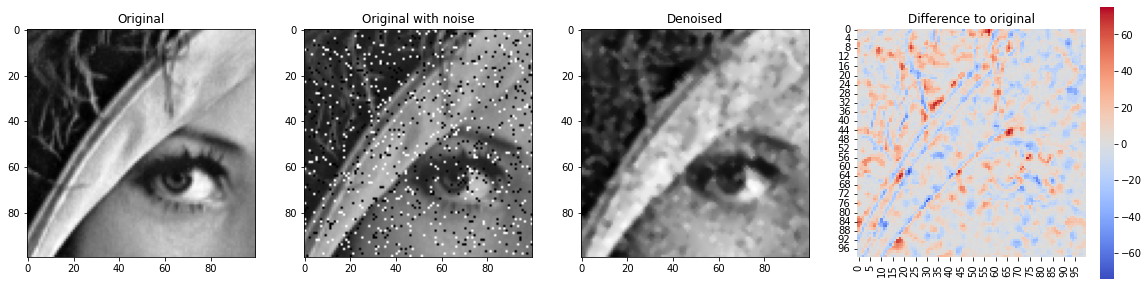

In [12]:
filtered = cv2.GaussianBlur(imgs['lenaSzum'], (3,3), 0)
filtered = cv2.medianBlur(filtered, 3)

plot_denoising(
    imgs['lena'][200:300, 200:300],
    imgs['lenaSzum'][200:300, 200:300],
    filtered[200:300, 200:300],
)

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

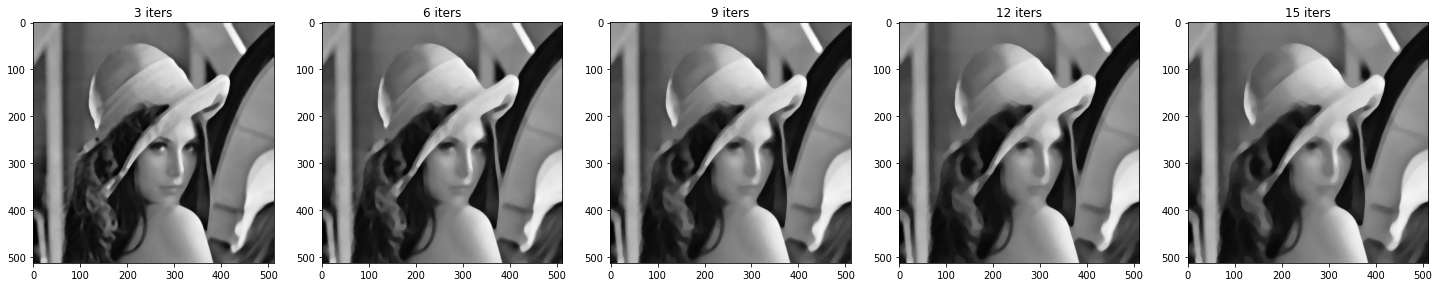

In [13]:
img = imgs['lena']
fig, axs = plt.subplots(ncols=5, figsize=(25,5))

for i in range(5):
    for _ in range(3):
        img = cv2.medianBlur(img, 7)
    axs[i].imshow(img, cmap="gray")
    axs[i].set_title(f"{3*(i+1)} iters")
        

plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

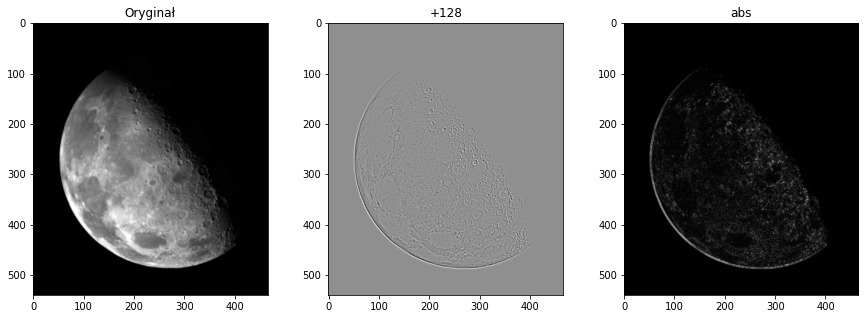

In [14]:
M = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
])
M = M/9

res = signal.convolve2d(imgs['moon'].astype(int), M, mode="same")
res1 = res + 128
res2 = np.abs(res)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.imshow(imgs['moon'], cmap="gray")
ax1.set_title("Oryginał")

ax2.imshow(res1, cmap="gray")
ax2.set_title("+128")

ax3.imshow(res2, cmap="gray")
ax3.set_title("abs")

plt.show()

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



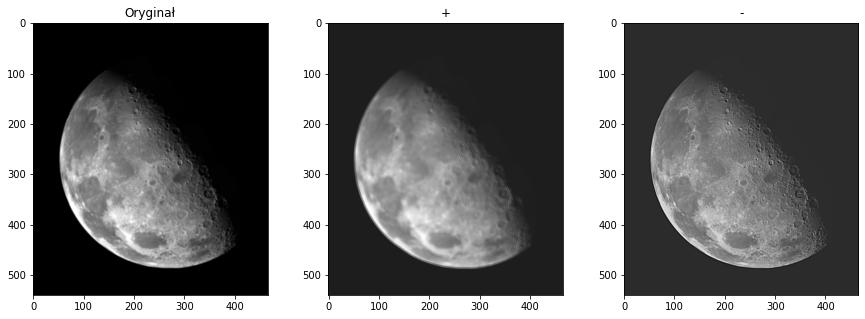

In [15]:
res = signal.convolve2d(imgs['moon'].astype(int), M, mode="same")
res_plus = imgs['moon'].astype(int) + 10*res
res_minus = imgs['moon'].astype(int) - 10*res

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.imshow(imgs['moon'], cmap="gray")
ax1.set_title("Oryginał")

ax2.imshow(res_plus, cmap="gray")
ax2.set_title("+")

ax3.imshow(res_minus, cmap="gray")
ax3.set_title("-")

plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [16]:
R1 = np.array([
    [0, 0, 0],
    [-1, 0, 0],
    [0, 1, 0]
])

R2 = np.array([
    [0, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

P1 = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

P2 = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

S1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

S2 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])


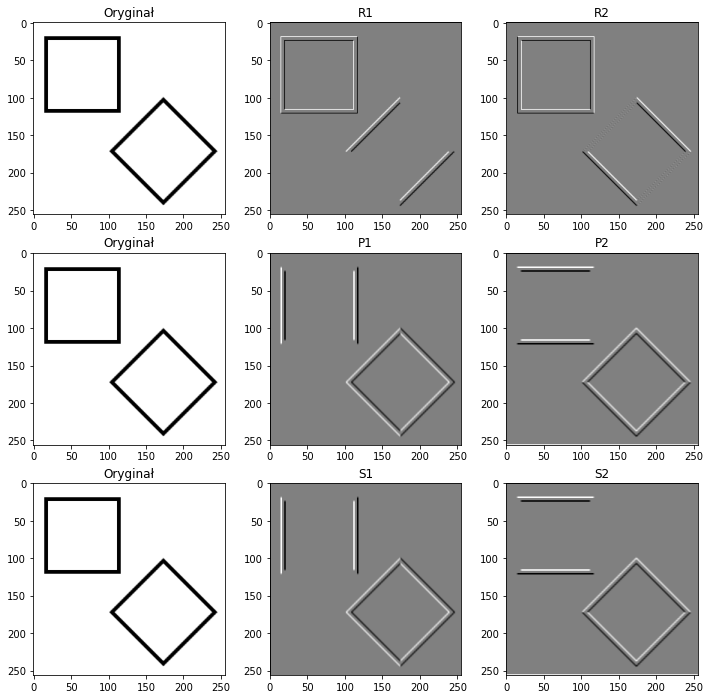

In [17]:
r1 = signal.convolve2d(imgs['kw'].astype(int), R1, mode="same")
r2 = signal.convolve2d(imgs['kw'].astype(int), R2, mode="same")
p1 = signal.convolve2d(imgs['kw'].astype(int), P1, mode="same")
p2 = signal.convolve2d(imgs['kw'].astype(int), P2, mode="same")
r1 = signal.convolve2d(imgs['kw'].astype(int), R1, mode="same")
r2 = signal.convolve2d(imgs['kw'].astype(int), R2, mode="same")
s1 = signal.convolve2d(imgs['kw'].astype(int), P1, mode="same")
s2 = signal.convolve2d(imgs['kw'].astype(int), P2, mode="same")

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12,12))
axs = axs.flatten()

axs[0].imshow(imgs['kw'], cmap="gray")
axs[0].set_title("Oryginał")
axs[1].imshow(r1, cmap="gray")
axs[1].set_title("R1")
axs[2].imshow(r2, cmap="gray")
axs[2].set_title("R2")

axs[3].imshow(imgs['kw'], cmap="gray")
axs[3].set_title("Oryginał")
axs[4].imshow(p1, cmap="gray")
axs[4].set_title("P1")
axs[5].imshow(p2, cmap="gray")
axs[5].set_title("P2")

axs[6].imshow(imgs['kw'], cmap="gray")
axs[6].set_title("Oryginał")
axs[7].imshow(s1, cmap="gray")
axs[7].set_title("S1")
axs[8].imshow(s2, cmap="gray")
axs[8].set_title("S2")


plt.show()

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [18]:
def edges1(img):
    s1 = signal.convolve2d(img.astype(int), S1, mode="same")
    s2 = signal.convolve2d(img.astype(int), S2, mode="same")
    
    edges = np.sqrt(np.square(s1) + np.square(s2))
    return edges

def edges2(img):
    s1 = signal.convolve2d(img.astype(int), S1, mode="same")
    s2 = signal.convolve2d(img.astype(int), S2, mode="same")
    
    edges = np.abs(s1) +  np.abs(s2)
    return edges

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

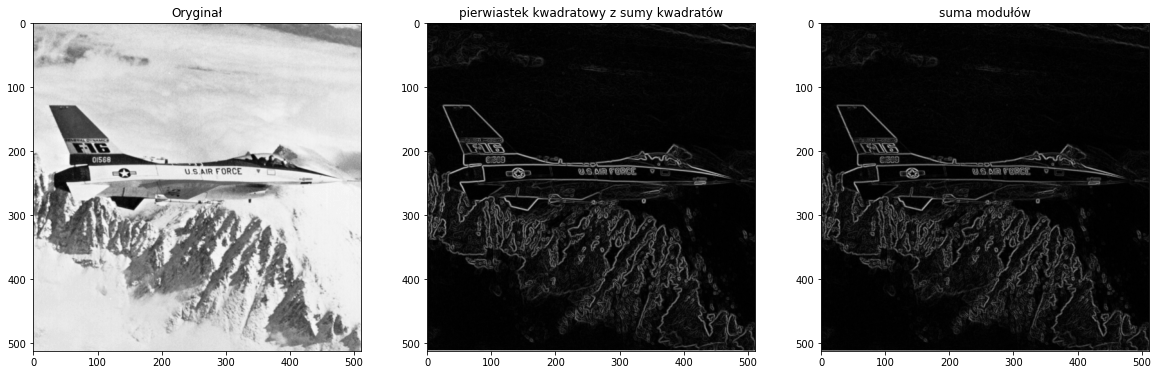

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))
ax1.imshow(imgs['jet'], cmap="gray")
ax1.set_title("Oryginał")


ax2.imshow(edges1(imgs['jet']), cmap="gray")
ax2.set_title("pierwiastek kwadratowy z sumy kwadratów")

ax3.imshow(edges2(imgs['jet']), cmap="gray")
ax3.set_title("suma modułów")

plt.show()
